## **Data Analysis and Data Science using Python Task 5**

**Task 1: Student Pass/Fail Prediction**

1. Dataset Selection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
import pandas as pd
df = pd.read_csv(r'C:\Users\koust\OneDrive\Desktop\Jupyter\Main Flow\Task 5\student_performance.csv')

2. Data Exploration

In [5]:
# Data Exploration
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


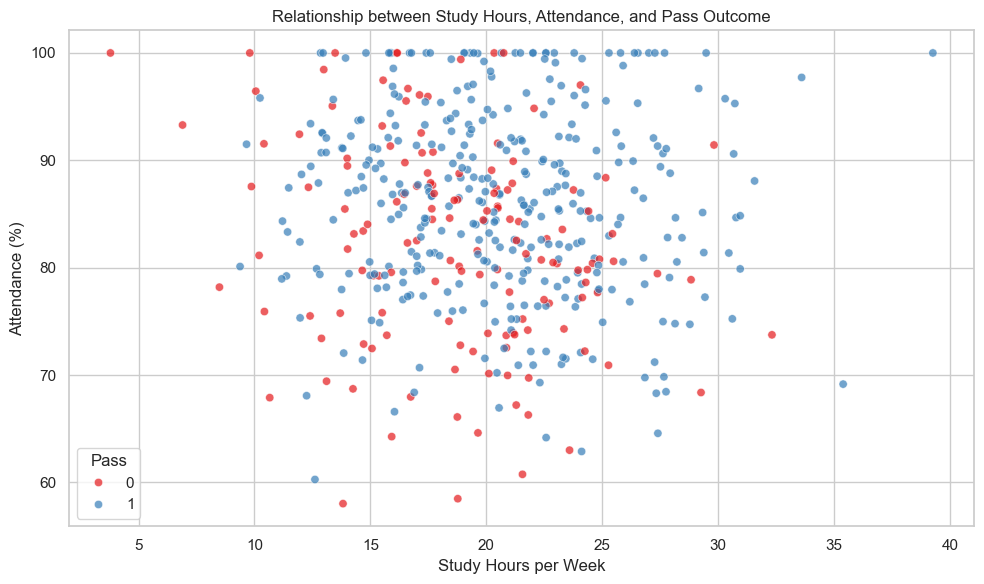

In [8]:
# Plot the relationship
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df, x="Study Hours", y="Attendance", hue="Pass", palette="Set1", alpha=0.7
)
plt.title("Relationship between Study Hours, Attendance, and Pass Outcome")
plt.xlabel("Study Hours per Week")
plt.ylabel("Attendance (%)")
plt.legend(title="Pass")
plt.tight_layout()
plt.show()

In [9]:
# Prepare data for modeling
X = df[['Study Hours', 'Attendance']]
y = df['Pass']


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data


# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train) # Now X_train and y_train are defined

# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 75.00%
Confusion Matrix:
[[ 5 24]
 [ 1 70]]


In [11]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 75.00%
Confusion Matrix:
[[ 5 24]
 [ 1 70]]


3. Insights

Study Hours: Students who study more tend to have higher chances of passing.

Attendance: A strong indicator of student consistency and potential to pass.

These two features positively correlate with student success and are reliable predictors of performance.

Task 2: Sentiment Analysis with Natural Language Processing

1. Dataset Selection

In [17]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('TestReviews.csv')


2. Tasks to Perform

In [18]:
# Text Preprocessing: Lowercase and remove punctuation
df['cleaned_review'] = df['review'].str.lower().str.replace('[^\w\s]', '', regex=True)


In [19]:
# TF-IDF Vectorization with English stopwords
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_review'])

# Target variable
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 92.14%
Precision: 0.91
Recall: 1.00
F1 Score: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.72      0.83       231
           1       0.91      1.00      0.95       634

    accuracy                           0.92       865
   macro avg       0.94      0.86      0.89       865
weighted avg       0.93      0.92      0.92       865



In [21]:
# Review examples: correct and incorrect predictions
df['prediction'] = model.predict(X)
correct = df[df['class'] == df['prediction']]
incorrect = df[df['class'] != df['prediction']]

print("\nCorrectly Classified Reviews (Sample):")
print(correct[['review', 'class', 'prediction']].sample(3, random_state=1))

print("\nIncorrectly Classified Reviews (Sample):")
print(incorrect[['review', 'class', 'prediction']].sample(3, random_state=1))


Correctly Classified Reviews (Sample):
                                                 review  class  prediction
4156  On name alone we HAD to check this place out, ...      0           0
3015  How incredibly pathetic.  I just had the worst...      0           0
4108  This place was AWFUL. I was using the groupon ...      0           0

Incorrectly Classified Reviews (Sample):
                                                 review  class  prediction
3150  How to put this gentlyWhile I may go back to P...      0           1
4014  Would like to give NO STARS.  bought all new k...      0           1
3527  If you are looking for an "after-school" progr...      0           1


3. Insights

Review Content: Reviews containing strong positive words (e.g., excellent, amazing, delicious) are more likely to be classified as positive.

TF-IDF Features: The TF-IDF vectorizer effectively identifies key sentiment-bearing words and phrases that significantly influence classification.

Sentiment Indicators: Positive sentiments are strongly associated with emotional or quality-related terms, while negative sentiments often involve dissatisfaction or poor service cues.

Misclassification Pattern: Some reviews labeled negative but containing positive phrases (e.g., describing food positively before criticizing service) were misclassified, highlighting the need for deeper contextual understanding.

These insights indicate that word usage patterns are strong predictors of sentiment, and simple models like logistic regression with TF-IDF can capture them effectively.